In [1]:
# project: p1
# submitter: debiche
# partner: none
# hours: 10

In [2]:
#q1
type(7/2)


float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
outside = False
if (x<5) or (x>10):   # True if x is outside the minimum-to-maximum range
    outside = True
outside

True

In [4]:
#q3
word = "KAFKAESQUE"
word = word.lower()
x = word.find("esque")     
suffix_match = ("esque" == word[x:])
suffix_match

True

In [5]:
def add(x, y=1):
    return x + y

    
    

In [6]:
#q4
add(3,4)


7

In [7]:
#q5
add(9)

10

In [8]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
def smart_count(arr):
    sum = 0
    for num in arr:
        if num >10:
            continue
        if num < 0:
            break
        sum += num
    return sum

In [10]:
#q7
nums = [3, 4, 1, 6]
smart_count(nums)

14

In [11]:
#q8
smart_count([2,1,11,3,15,-1,8,2])

6

In [12]:
#q9
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1, "z": 3.14}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [13]:
#q10
rows[0][-1]["x"]

8

In [14]:
#q11
import copy
v2 = copy.deepcopy(rows)
v2[0] = 8888    # first change
rows
v2 = copy.copy(rows)
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [15]:
#q12
sum = 0
count = 0
for x in range(len(rows)):
    num = rows[count][header.index("B")]
    count += 1
    sum += num
sum


10007

In [16]:
#q13
rows.sort(key=lambda row: row[header.index("B")], reverse=True)
rows

[[3, 9999, {'x': 9, 'y': 2}],
 [1, 6, {'x': 8, 'y': 5}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [17]:
#q14
import json
usd = 400
f = open("usd.json")
data = json.load(f)
rate = data["eur"]["rate"]
euro = 400/rate
f.close()
euro

390.5156323143553

In [18]:
def divide(x, y):
    try:
        return x / y
    except ZeroDivisionError:
        return float("nan")
    

In [19]:
#q15
divide(3,2)



1.5

In [20]:
#q16
divide(-3,0)

nan

In [21]:
import os
import pandas as pd

years = {}
os.getcwd()
path = "/home/ami/f22/p1/home-computers/"
for x in os.listdir(path):
    point = x.find(".")
    df = pd.read_csv(path+x, skiprows = 1)
    df = df.set_index('Geographic Area Name')
    years[int((x[point-4 :point]))] = df



In [22]:
#q17
sorted_years = sorted(years.keys())
sorted_years

[2013, 2014, 2015, 2016, 2017, 2018]

In [23]:
#q18
df = years[2018]
estimate = df.loc["Wisconsin","Estimate!!Total"]
estimate

2371960

In [24]:
#q19
no_computer = df["Estimate!!Total!!No Computer"]
sum_households = no_computer.sum()
sum_households

10285814

In [25]:
#q20
moe = df["Margin of Error!!Total!!No Computer"]
max_moe = (moe/no_computer).max()
max_moe

0.12375641594322287

In [26]:
#q21
states = ["Illinois", "Indiana","Iowa","Michigan","Minnesota","Wisconsin"]
dict = {}
for state in states:
    dict[state] = (no_computer[state] / df.loc[state, "Estimate!!Total"]) *100
dict

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

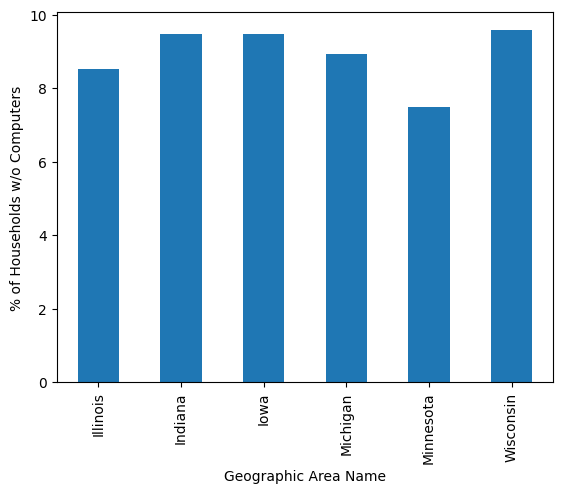

In [27]:
#q22
s = pd.Series(dict)
ax = s.plot.bar(xlabel="Geographic Area Name", ylabel="% of Households w/o Computers")


{2013: 386.475,
 2014: 347.4,
 2015: 315.939,
 2016: 270.412,
 2017: 246.916,
 2018: 227.293}

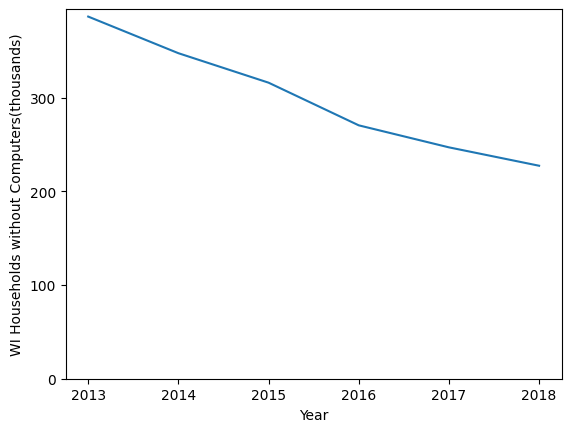

In [43]:
#q23
data = {}
for key in sorted_years:
    df = years[key]
    data[key] = (df.loc["Wisconsin"]["Estimate!!Total!!No Computer"]) / 1000

datapd = pd.Series(data) 
datax = datapd.plot(xlabel= "Year", ylabel= "WI Households without Computers(thousands)",yticks=range(0,400,100))
datax
data

<AxesSubplot:xlabel='Smartphones (millions)', ylabel='Tablets (millions)'>

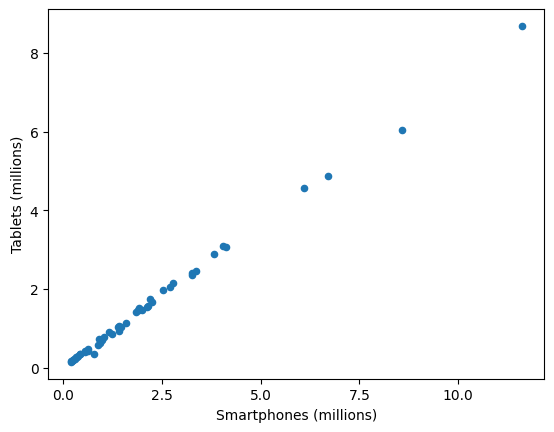

In [29]:
#q24
df = years[2018]
smartphone_series = pd.Series((df["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]))
tablets_series = pd.Series(df["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"])
frame = { 'Smartphones (millions)': smartphone_series, 'Tablets (millions)':tablets_series}
result = pd.DataFrame(frame)
result = (result/1000000)
result.plot.scatter(x= 'Smartphones (millions)', y= 'Tablets (millions)',legend = False, xticks=(0.0,2.5,5.0,7.5,10.0))

In [30]:
#q25
from subprocess import check_output
path = os.getcwd() + "/flask"
output = check_output(["git","checkout","main"], cwd=path)
output = check_output(["git","log"], cwd=path, encoding="utf-8").split('\n',1)[0]
output

Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [31]:
#q26
output = check_output(["git","checkout","main"], cwd=path)
output = check_output(["git","log"], cwd=path, encoding="utf-8").split('\n')

list = []
word_length=6
for x in output:
    if x.startswith("commit"):
        split = x.split()
        if len(split) == 2:
            list.append(split[1])
list[-50:]        

Already on 'main'


['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [32]:
#q27
path = os.getcwd() + "/flask"
commit = list[-3]
output = check_output(["git","checkout","4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4"], cwd=path)
output
f = open("flask/README")
data = f.read()
f.close()
data

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [33]:
#q28
output = check_output(["git","checkout","main"], cwd=path)
output = check_output(["git","log"], cwd=path, encoding="utf-8").split('\n')
pull_users = {}
for line in output:
    if "Merge pull request" in line:
        pos = line.find("from")
        pos+=5
        slash = line.find("/")
        if slash != -1:
            name = line[pos:slash]
            if name in pull_users:
                pull_users[name] += 1
            else:
                pull_users[name] = 1
user_list = {}
for key in pull_users:
    if pull_users[key] >= 5:
        user_list[key] = pull_users[key]
user_list      

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [34]:
#q29
import subprocess

try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
msg = msg.decode('UTF-8')
msg

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [35]:
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

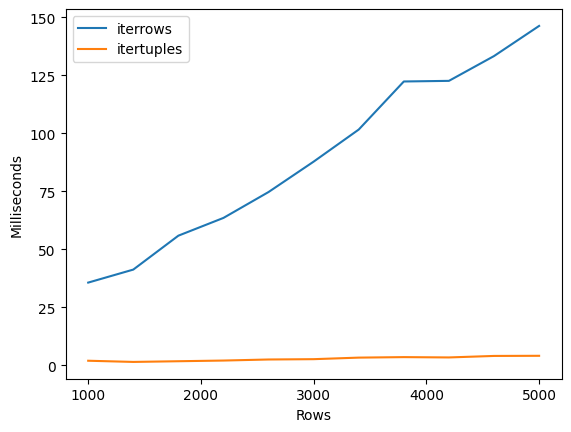

In [36]:
#q30
import time
import numpy as np

times_df = pd.DataFrame(dtype = float)
for x in range(1000,5400,400):
    df = rand_df(x)
    t0 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    for row in df.iterrows():
        pass
    t1 = time.time()
    times_df.at[x,"iterrows"] = ((t1-t0)*1000)
    t2 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    for row in df.itertuples():
        pass
    t3 = time.time()
    times_df.at[x,"itertuples"]=((t3-t2)*1000)
    
times_df.plot.line(xlabel = "Rows", ylabel= "Milliseconds", xticks=range(1000,6000,1000),yticks=range(0,175,25))



<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

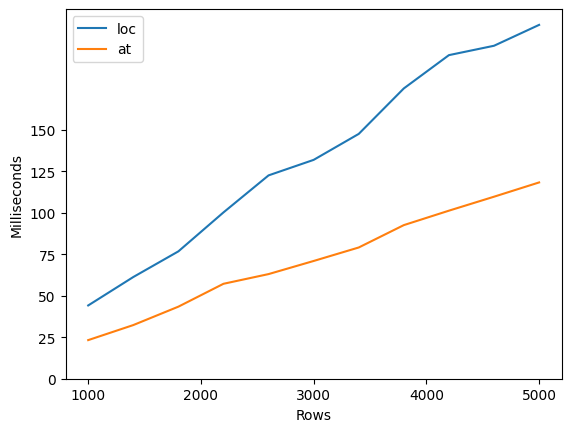

In [37]:
#q31
times_df = pd.DataFrame(dtype = float)
for x in range(1000,5400,400):
    df = rand_df(x)
    t0 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    times_df.at[x,"loc"] = ((t1-t0)*1000)
    t2 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t3 = time.time()
    times_df.at[x,"at"]=((t3-t2)*1000)
times_df.plot.line(xlabel = "Rows", ylabel= "Milliseconds", xticks=range(1000,6000,1000),yticks=range(0,175,25))


In [38]:
def laugh(x):
    return "ha" * x

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

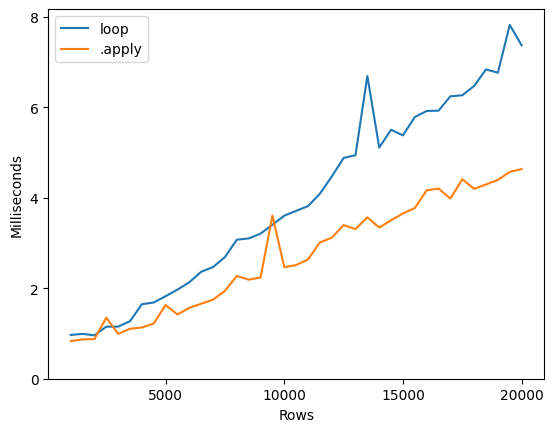

In [39]:
#q32
def laugh(x):
    return "ha" * x
times_df = pd.DataFrame(dtype = float)
for x in range(1000,20500,500):
    df = rand_df(x)
    t0 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    times_df.at[x,"loop"] = ((t1-t0)*1000)
    t2 = time.time()
    # HOW LONG DOES THIS TAKE TO RUN, FOR DATAFRAMES WITH DIFFERENT NUMBERS OF ROWS?
    result = df["A"].apply(laugh).tolist()
    t3 = time.time()
    times_df.at[x,".apply"]=((t3-t2)*1000)
times_df.plot.line(xlabel = "Rows", ylabel= "Milliseconds", xticks=range(5000,25000,5000),yticks=range(0,10,2))
